# Planar Data Classification

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from Dataset import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

%matplotlib inline

## Loading dataset

In [18]:
features, labels = load_planar_dataset()
cols1 = features[0]
cols2 = features[1]
predictor = labels[0]

### Visualizing the Data

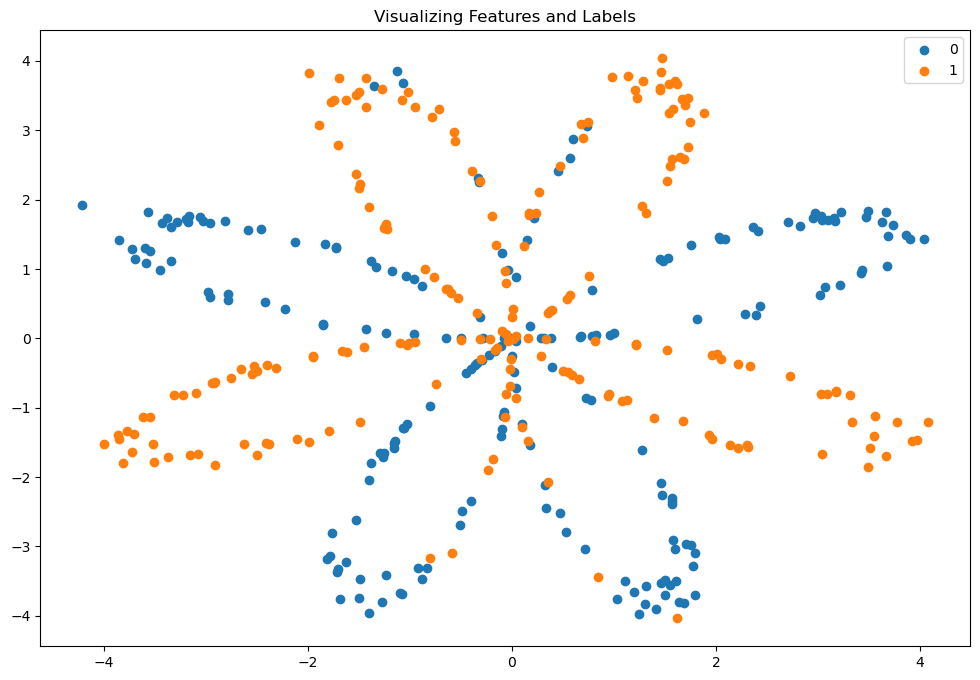

In [19]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(cols1[predictor==1], cols2[predictor==1], label = '0')
ax.scatter(cols1[predictor==0], cols2[predictor==0], label = '1')
ax.set_title('Visualizing Features and Labels')
leg = ax.legend();

In [20]:
shape_X = features.shape
shape_Y = labels.shape
m = predictor.shape

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have %d training sample!' % (m))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have 400 training sample!


## Logistic Regression

In [21]:
from sklearn.model_selection import train_test_split
x_vals = np.concatenate((cols1.reshape((400,1)), cols2.reshape((400,1))), axis=1)
X = np.asarray(x_vals)
Y = np.asarray(predictor.reshape((400,1)))
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size = 0.50,random_state=0)
model = LogisticRegression(max_iter=100000)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
score = accuracy_score(y_test, prediction)
score

C:\Users\andre\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.495

Plotting the decision boundary of the model.

Text(0.5, 1.0, 'Logistic Regression')

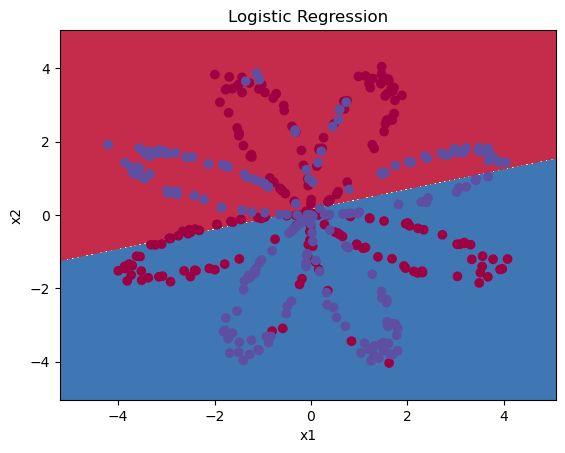

In [22]:
from Dataset import plot_decision_boundary
plot_decision_boundary(lambda x: model.predict(x), features, labels)
plt.title("Logistic Regression")

Logistic regression has poor performance because the dataset is not linearly separable

## Neural Network model

Since logistic regression did rather poorly. Let's switch from traditional binary classification algorithms to a multi-layer perceptron.

First, we are going to build a three layer MLP network.

In [23]:
def layerSizes(X):
    """
    X -- input data
    """
    input_layer_size = X.shape[0]
    hidden_layer_size = 4
    output_layer_size = 1
    
    """
    Returns:
    input_layer_size -- the size of the input layer
    hidden_layer_size -- the size of the hidden layer
    output_layer_size -- the size of the output layer
    """
    
    return input_layer_size, hidden_layer_size, output_layer_size

In [24]:
input_layer_size, hidden_layer_size, output_layer_size = layerSizes(features)
print("The size of the input layer is: " + str(input_layer_size))
print("The size of the hidden layer is: " + str(hidden_layer_size))
print("The size of the output layer is: " + str(output_layer_size))

The size of the input layer is: 2
The size of the hidden layer is: 4
The size of the output layer is: 1


In [25]:
def initialize_parameters(input_size, hidden_size, output_size):
    """
    input_size-- size of the input layer
    hidden_size -- size of the hidden layer
    output_size-- size of the output layer
    """
    np.random.seed(2)
    
    Weight1 = np.random.rand(hidden_size, input_size + 1) * 0.01
    Weight2 = np.random.rand(output_size, hidden_size + 1) * 0.01
    
    parameters = {'Weight1': Weight1, 'Weight2': Weight2}
    
    """
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix 1
                    W2 -- weight matrix 2 
    """
    return parameters

In [26]:
parameters = initialize_parameters(*layerSizes(features))
print("Weight1 = " + str(parameters["Weight1"].shape))
print("Weight2 = " + str(parameters["Weight2"].shape))

Weight1 = (4, 3)
Weight2 = (1, 5)


Let's implement forward propagation. It will propagate the gradient in the forward pass from one layer to another.

In [27]:
def forward_prop(X, parameters):
    """
    X -- input data
    parameters -- python dictionary containing your parameters (output of initialization function)
    """
    # Retrieve each parameter from the dictionary "parameters"
    Weight1 = parameters['Weight1'] 
    Weight2 = parameters['Weight2'] 
    
   
    # Add bias term to X
    one=np.ones(X.shape[1])  
    X=np.vstack ((one, X) ) #Adding ones as bias
  
    # Compute pass from layer 1 to layer 2 and activation
    z2 = np.dot(Weight1, X)
    a2 = np.tanh(z2)
    
    # add bias term to a2
    one = np.ones(a2.shape[1])
    a2  = np.vstack ((one, a2) )
    
    # Compute pass from layer 2 to layer 3 and activation
    z3 = np.dot(Weight2, a2)
    a3 = sigmoid(z3)
    
    cache = {"z2": z2,
             "a2": a2,
             "z3": z3,
             "a3": a3}
    """
    Returns:
    a3 -- The sigmoid output of the second activation
    cache -- a dictionary containing "z2", "a2", "z3" and "a3"
    """
    return np.array(a3), cache

Testing forward propagation functionality

In [28]:
np.random.seed(1) 
X_test = np.random.randn(2, 2)

parameters = {
    'Weight1': 
        np.array([
            [-0.00416758, -0.00056267,-0.00056127],
            [-0.02136196,  0.01640271,-0.00056123],
            [-0.01793436, -0.00841747,-0.00036123],
            [ 0.00502881, -0.01245288,-0.00026117]
        ]),
     'Weight2': 
        np.array([
             [-0.01057952, -0.00909008,  0.00551454,  0.02292208,0.02292223]
     ])
}


a3, cache = forward_prop(X_test, parameters)

print("Your output:\n",np.mean(cache['z2']), np.mean(cache['a2']), np.mean(cache['z3']), np.mean(cache['a3']))

Your output:
 -0.00989624831022699 0.19208511191331104 -0.011139109844842423 0.4972152514624493


Now let's implement the compute_cost() fucntion to compute the value of the cost.

In [29]:
def compute_cost(a3, Y):
    """
    Computes the cross-entropy cost given in equation (7) or in other way you may want.
    
    Arguments:
    a3 -- The sigmoid output of the second activation
    Y -- "true" labels vector of shape 
    
    """
    m =  Y.shape[1]

    # Compute the cross-entropy cost
    logprobs = np.multiply(np.log(a3),Y) + np.multiply(np.log(1-a3), (1-Y))
    cost = -1/m*np.sum(logprobs) 
    
    cost = float(np.squeeze(cost))
    
    return cost

In [30]:
# testing function for compute_cost
np.random.seed(1) 
Y_true = np.random.randn(1, 3)

a3 = np.array([ 0.5002307,  0.49985831,  0.50023963])
print("cost =", compute_cost(a3, Y_true))

cost = 0.6929198937761265


Implementing backward propagation function

In [31]:
def backward_propagation(parameters, cache, X, Y):
    """
    parameters -- dictionary containing weights 
    cache -- a dictionary containing "z2", "a2", "z3" and "a3".
    X -- input data
    Y -- "true" labels vector 
    """
    m = X.shape[1]
    
    Weight1 = parameters['Weight1']
    Weight2 = parameters['Weight2']
    
    # Append ones column
    one = np.ones(X.shape[1])
    X = np.vstack((one, X))
    
    z2 = cache['z2'] 
    a2 = cache['a2'] 
    a3 = cache['a3'] 
    
    #  calculate d3, dW2. 
    d3 = a3 - Y
   
    dW2 = d3 @ a2.T
    
    #Below we will calculate delta 2. In the hidden layer,we have bias which we will exclude as it is not going backward.
    
    d2 = Weight2.T @ d3
    d2 = d2[1:] #We need to exclude the bias as it is not backpropagating.
    
    d2 = d2 * (1 - np.power(np.tanh(z2), 2))
    
    dW1 = d2 @ X.T 
    
    #in the gradient dict we will keep the update for the weight vectors.
    
    gradient = {"dW1" : 1 / m * dW1,
                "dW2" : 1 / m * dW2}
    
    return gradient

In [32]:
# Testing function for backward propagation
np.random.seed(1) 
X_test = np.random.randn(2, 1)
Y_test = np.random.randn(1, 1)

parameters = {
    'Weight1': 
        np.array([[-0.00416758, -0.00056267, -0.0005612345],
                  [-0.02136196,  0.01640271, 0.0005612343],
                  [-0.01793436, -0.00841747, -0.0005612365],
                  [ 0.00502881, -0.01245288, -0.0005211234]]),
    'Weight2': 
        np.array([[-0.01057952, -0.00909008, 0.00551432, 0.00551454, 0.02292208]])
}

cache = {
    'z2': np.array([[-0.00616586],
                    [-0.05229879],
                    [-0.02009991],
                    [0.02153007]]),
    'a2': np.array([[1],
                    [-0.05225116],
                    [-0.02009721],
                    [0.02152675],
                    [0.02152675]]),
    'z3': np.array([[ 0.00092281]]),
    'a3': np.array([[ 0.5002307]])  
}

grads = backward_propagation(parameters, cache, X_test, Y_test)

print ("dW1 = " + str(grads["dW1"]))
print ("dW2 = " + str(grads["dW2"]))

dW1 = [[-0.00934791 -0.01518423  0.00571864]
 [ 0.00565546  0.00918642 -0.00345976]
 [ 0.00566888  0.00920821 -0.00346797]
 [ 0.0235622   0.03827315 -0.01441433]]
dW2 = [[ 1.02840245 -0.05373522 -0.02066802  0.02213816  0.02213816]]


The update rule will allow us to update our weights and pass our gradient through the network.

In [33]:
def update_parameters(parameters, grads, learning_rate = 0.5):
    """
    parameters -- dictionary containing network weights 
    grads -- dictionary containing gradients 
    learning_rate -- learning rate for gradient update
    """
    Weight1 = parameters['Weight1'] 
    Weight2 = parameters['Weight2'] 
     
    dW1 = grads["dW1"]
    
    dW2 = grads["dW2"]
    
    # Update rule for each parameter
    
    Weight1 = Weight1 - dW1 * learning_rate
    Weight2 = Weight2 - dW2 * learning_rate

    
    parameters = {"Weight1": Weight1,
                  "Weight2": Weight2}
    
    """
    Returns:
    parameters -- python dictionary containing your updated parameters
    """
    return parameters

In [34]:
# testing function update_parameters
np.random.seed(1) 

parameters = {
    'Weight1':
        np.array([[-0.00416758, -0.00056267, -0.00056127],
                  [-0.02136196, 0.01640271, -0.00056123],
                  [-0.01793436, -0.00841747, -0.00036123],
                  [0.00502881, -0.01245288, -0.00026117],]),
    'Weight2': 
        np.array([[-0.01057952, -0.00909008, 0.00551454, 0.02292208, 0.02292223]])
}

grads = {
    'dW1': 
        np.array([[0.00023322, -0.00205423, -0.00205423],
                  [0.00082222, -0.00700776, -0.00205423],
                  [-0.00031831, 0.0028636, -0.00205423 ],
                  [-0.00092857, 0.00809933, -0.00205423]]),
    'dW2': 
        np.array([[-1.75740039e-05, 3.70231337e-03, -1.25683095e-03, -2.55715317e-03, -2.55715317e-03]])
}

parameters = update_parameters(parameters, grads)

print("Weight1 = " + str(parameters["Weight1"]))
print("Weight2 = " + str(parameters["Weight2"]))

Weight1 = [[-0.00428419  0.00046445  0.00046585]
 [-0.02177307  0.01990659  0.00046589]
 [-0.0177752  -0.00984927  0.00066589]
 [ 0.00549309 -0.01650255  0.00076595]]
Weight2 = [[-0.01057073 -0.01094124  0.00614296  0.02420066  0.02420081]]


Let's put everything together now.

In [35]:
def model(X, Y, n_h, num_epochs=1000, learning_rate=0.1, print_cost=True):
    """
    X -- dataset
    Y -- labels
    n_h -- number of hidden layers
    learning_rate -- Percent of gradient update used
    num_epochs -- Number of iterations in gradient descent
    print_cost -- if True, print cost every 100 iterations
    
    Returns:
    parameters -- parameters learnt by the model
    """
    
    n_x = X.shape[0]
    n_y = len(np.unique(Y))
    
    if n_y <= 2:
        n_y = 1
    
    # Initialize parameters
    parameters = initialize_parameters(n_x, n_h, n_y) 
    Weight1 = parameters['Weight1']
    Weight2 = parameters['Weight2']
    
    # gradient descent

    for i in range(0, num_epochs):
         
        # Call the Forward propagation with X, and parameters.
        
        a3, cache = forward_prop(X, parameters)
        
        # Call the Cost function with a3, Y and parameters.
        
        cost = compute_cost(a3, Y)
        
        # Call Backpropagation with Inputs, parameters, cache, X and Y.
        grads = backward_propagation(parameters, cache, X, Y)
        
        # Update gradient descent parameter with  parameters and grads and learning rate.
        parameters = update_parameters(parameters, grads, learning_rate)
 
        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [36]:
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    parameters -- dictionary containing your weights 
    X -- input data
    
    Returns
    predictions -- vector of model predictions (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    a3, cache = forward_prop(X, parameters)
    predictions = (a3 > 0.5)
    
    return predictions

Cost after iteration 0: 0.693165
Cost after iteration 100: 0.693028
Cost after iteration 200: 0.689037
Cost after iteration 300: 0.678437
Cost after iteration 400: 0.670607
Cost after iteration 500: 0.652813
Cost after iteration 600: 0.631744
Cost after iteration 700: 0.619616
Cost after iteration 800: 0.609128
Cost after iteration 900: 0.568263
Cost after iteration 1000: 0.492017
Cost after iteration 1100: 0.439021
Cost after iteration 1200: 0.406729
Cost after iteration 1300: 0.386203
Cost after iteration 1400: 0.372296
Cost after iteration 1500: 0.362293
Cost after iteration 1600: 0.354729
Cost after iteration 1700: 0.348777
Cost after iteration 1800: 0.343943
Cost after iteration 1900: 0.339916
Cost after iteration 2000: 0.336495
Cost after iteration 2100: 0.333537
Cost after iteration 2200: 0.330946
Cost after iteration 2300: 0.328648
Cost after iteration 2400: 0.326590
Cost after iteration 2500: 0.324731
Cost after iteration 2600: 0.323040
Cost after iteration 2700: 0.321491
Cost

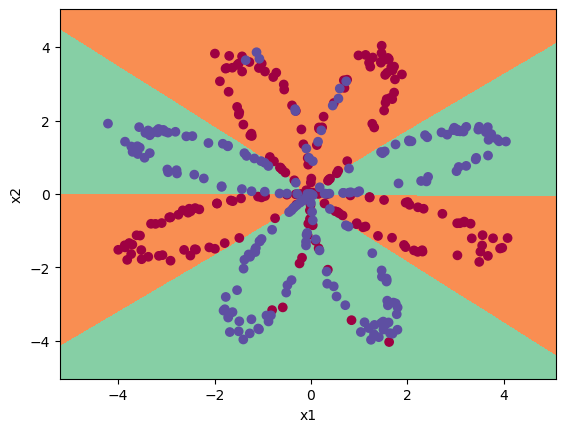

In [37]:
parameters = model(features, labels, 4, num_epochs=15000)

plot_decision_boundary(lambda X: predict(parameters, X.T), features, labels.ravel())

In [38]:
predictions = predict(parameters, features)
print('Accuracy: %d' % float((np.dot(labels, predictions.T) + np.dot(1-labels, 1-predictions.T)) / float(labels.size) * 100) + '%')

Accuracy: 89%


Let's try out several hidden layers to see how this hyper-parameter effects accuracy.

Cost after iteration 0: 0.693154
Cost after iteration 100: 0.693143
Cost after iteration 200: 0.692956
Cost after iteration 300: 0.688569
Cost after iteration 400: 0.678676
Cost after iteration 500: 0.665048
Cost after iteration 600: 0.657941
Cost after iteration 700: 0.654303
Cost after iteration 800: 0.652012
Cost after iteration 900: 0.650387
Cost after iteration 1000: 0.649152
Cost after iteration 1100: 0.648170
Cost after iteration 1200: 0.647364
Cost after iteration 1300: 0.646686
Cost after iteration 1400: 0.646103
Cost after iteration 1500: 0.645596
Cost after iteration 1600: 0.645148
Cost after iteration 1700: 0.644748
Cost after iteration 1800: 0.644388
Cost after iteration 1900: 0.644061
Cost after iteration 2000: 0.643762
Cost after iteration 2100: 0.643486
Cost after iteration 2200: 0.643232
Cost after iteration 2300: 0.642995
Cost after iteration 2400: 0.642774
Cost after iteration 2500: 0.642568
Cost after iteration 2600: 0.642373
Cost after iteration 2700: 0.642190
Cost

Cost after iteration 3400: 0.316347
Cost after iteration 3500: 0.315358
Cost after iteration 3600: 0.314418
Cost after iteration 3700: 0.313521
Cost after iteration 3800: 0.312665
Cost after iteration 3900: 0.311844
Cost after iteration 4000: 0.311057
Cost after iteration 4100: 0.310301
Cost after iteration 4200: 0.309573
Cost after iteration 4300: 0.308870
Cost after iteration 4400: 0.308192
Cost after iteration 4500: 0.307537
Cost after iteration 4600: 0.306902
Cost after iteration 4700: 0.306287
Cost after iteration 4800: 0.305690
Cost after iteration 4900: 0.305111
Accuracy for 5 hidden units: 88.0 %
Cost after iteration 0: 0.693230
Cost after iteration 100: 0.692561
Cost after iteration 200: 0.681326
Cost after iteration 300: 0.674431
Cost after iteration 400: 0.671968
Cost after iteration 500: 0.664507
Cost after iteration 600: 0.650989
Cost after iteration 700: 0.636975
Cost after iteration 800: 0.624722
Cost after iteration 900: 0.608494
Cost after iteration 1000: 0.571120
Cost

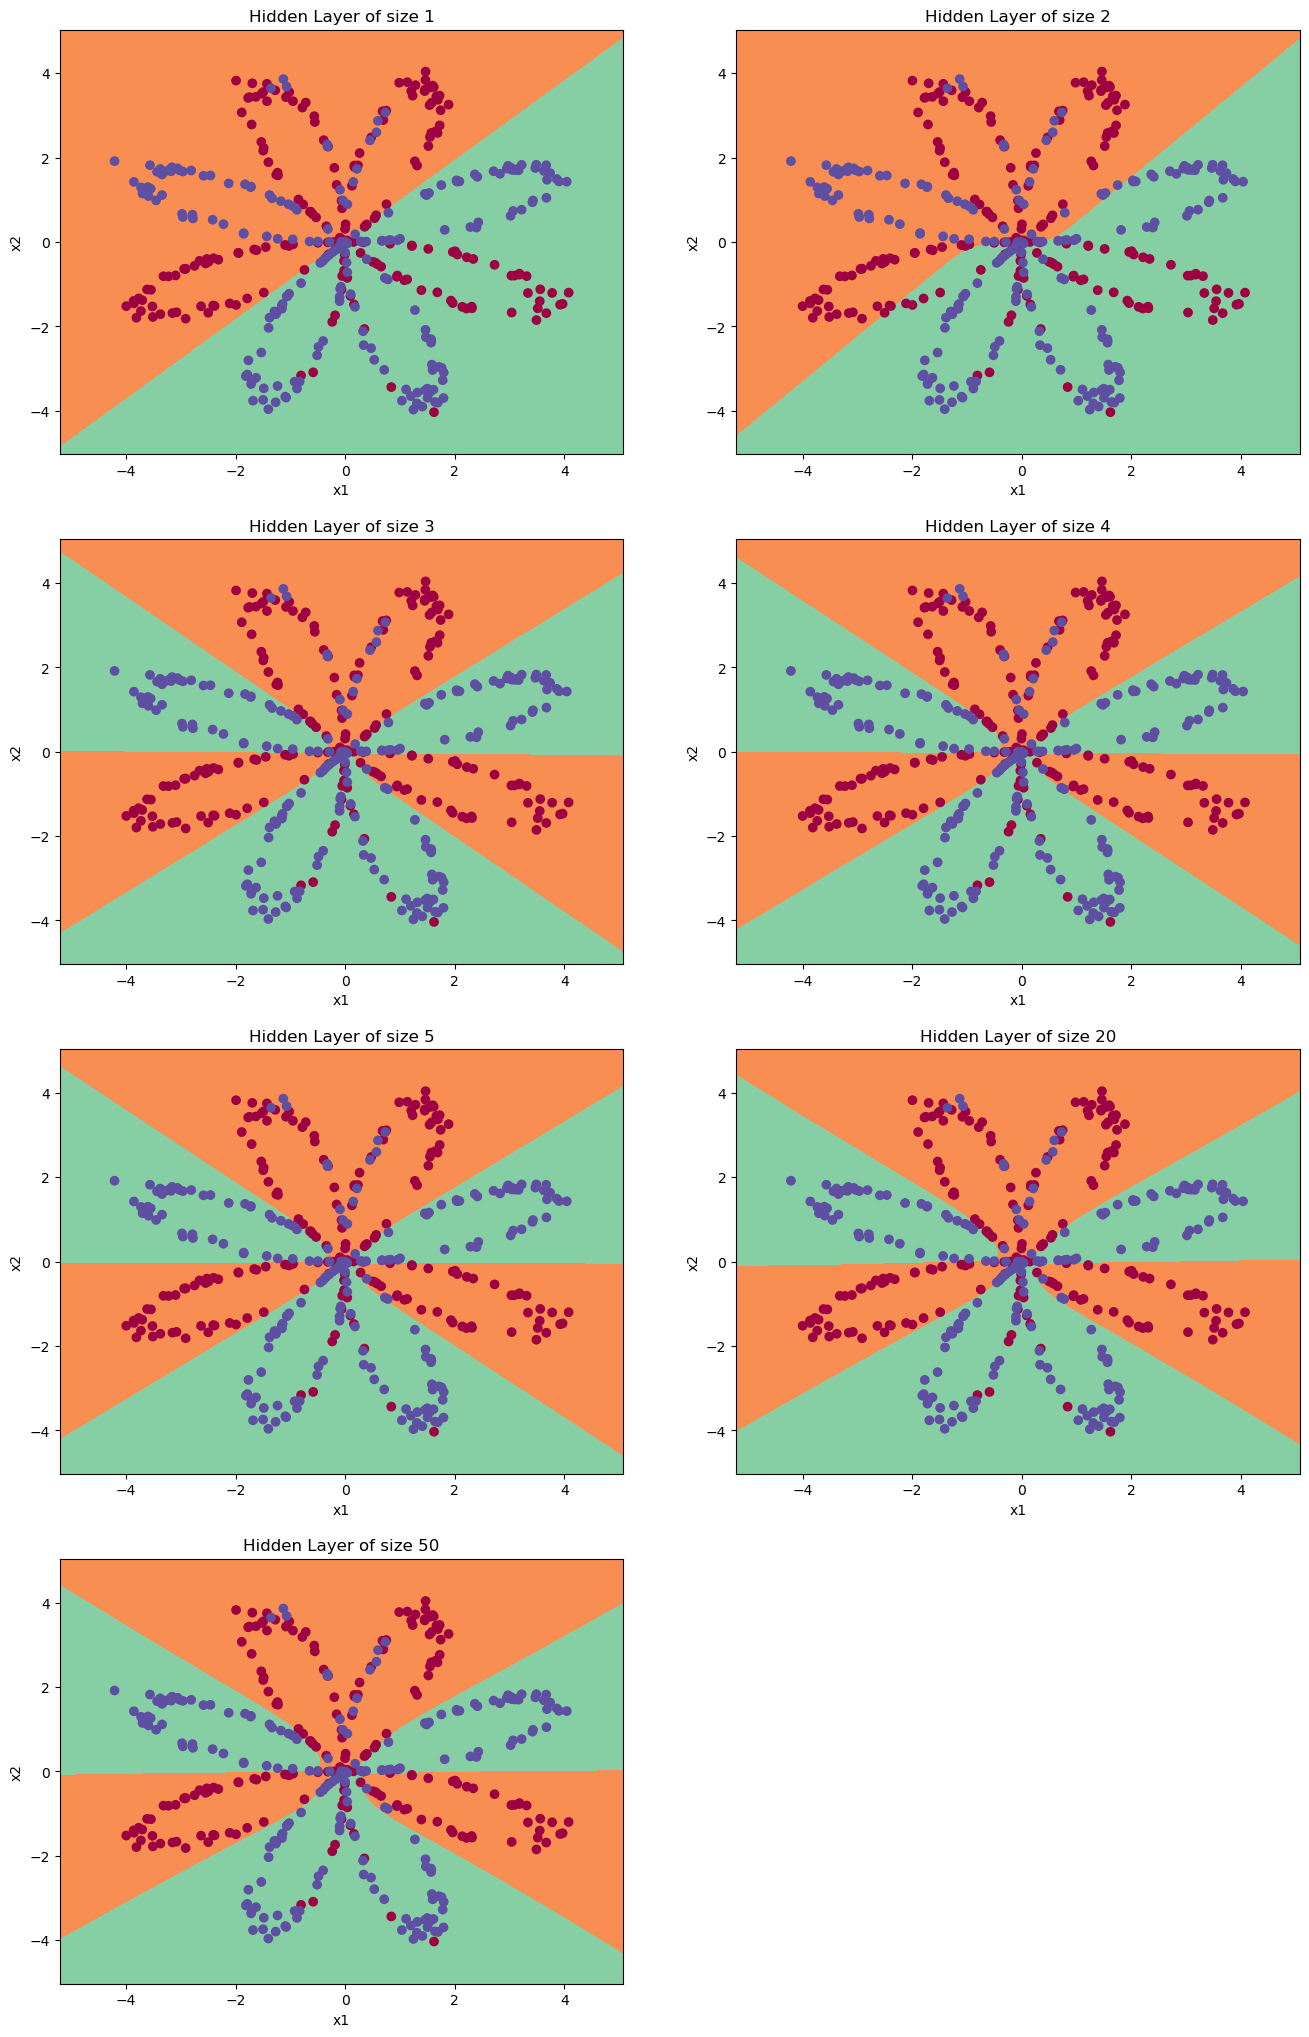

In [39]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    
    parameters = model(features, labels, n_h, num_epochs = 5000) 
    plot_decision_boundary(lambda X: predict(parameters, X.T), features, labels.ravel()) 
    
    predictions = predict(parameters, features) 
    accuracy = float((np.dot(labels, predictions.T) + np.dot(1-labels, 1-predictions.T))/float(labels.size)*100) #Write your code here
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

The larger models which have more hidden unit fit the training set better although when you get to the largest models it will overfit the data. This comes from giving the model too much data which is what is happening to the larger models. The best hidden layer size is around 5.

Let's look at how learning_rate affects the model

Cost after iteration 0: 0.693154
Cost after iteration 100: 0.693143
Cost after iteration 200: 0.692956
Cost after iteration 300: 0.688569
Cost after iteration 400: 0.678676
Cost after iteration 500: 0.665048
Cost after iteration 600: 0.657941
Cost after iteration 700: 0.654303
Cost after iteration 800: 0.652012
Cost after iteration 900: 0.650387
Cost after iteration 1000: 0.649152
Cost after iteration 1100: 0.648170
Cost after iteration 1200: 0.647364
Cost after iteration 1300: 0.646686
Cost after iteration 1400: 0.646103
Cost after iteration 1500: 0.645596
Cost after iteration 1600: 0.645148
Cost after iteration 1700: 0.644748
Cost after iteration 1800: 0.644388
Cost after iteration 1900: 0.644061
Cost after iteration 2000: 0.643762
Cost after iteration 2100: 0.643486
Cost after iteration 2200: 0.643232
Cost after iteration 2300: 0.642995
Cost after iteration 2400: 0.642774
Cost after iteration 2500: 0.642568
Cost after iteration 2600: 0.642373
Cost after iteration 2700: 0.642190
Cost

Cost after iteration 3200: 0.318489
Cost after iteration 3300: 0.317389
Cost after iteration 3400: 0.316347
Cost after iteration 3500: 0.315358
Cost after iteration 3600: 0.314418
Cost after iteration 3700: 0.313521
Cost after iteration 3800: 0.312665
Cost after iteration 3900: 0.311844
Cost after iteration 4000: 0.311057
Cost after iteration 4100: 0.310301
Cost after iteration 4200: 0.309573
Cost after iteration 4300: 0.308870
Cost after iteration 4400: 0.308192
Cost after iteration 4500: 0.307537
Cost after iteration 4600: 0.306902
Cost after iteration 4700: 0.306287
Cost after iteration 4800: 0.305690
Cost after iteration 4900: 0.305111
Cost after iteration 5000: 0.304548
Cost after iteration 5100: 0.304000
Cost after iteration 5200: 0.303467
Cost after iteration 5300: 0.302947
Cost after iteration 5400: 0.302441
Cost after iteration 5500: 0.301947
Cost after iteration 5600: 0.301465
Cost after iteration 5700: 0.300994
Cost after iteration 5800: 0.300534
Cost after iteration 5900: 0

Cost after iteration 6100: 0.295496
Cost after iteration 6200: 0.295019
Cost after iteration 6300: 0.294555
Cost after iteration 6400: 0.294103
Cost after iteration 6500: 0.293662
Cost after iteration 6600: 0.293232
Cost after iteration 6700: 0.292812
Cost after iteration 6800: 0.292402
Cost after iteration 6900: 0.292002
Cost after iteration 7000: 0.291611
Cost after iteration 7100: 0.291228
Cost after iteration 7200: 0.290853
Cost after iteration 7300: 0.290486
Cost after iteration 7400: 0.290126
Cost after iteration 7500: 0.289774
Cost after iteration 7600: 0.289428
Cost after iteration 7700: 0.289089
Cost after iteration 7800: 0.288756
Cost after iteration 7900: 0.288429
Cost after iteration 8000: 0.288107
Cost after iteration 8100: 0.287791
Cost after iteration 8200: 0.287480
Cost after iteration 8300: 0.287174
Cost after iteration 8400: 0.286873
Cost after iteration 8500: 0.286576
Cost after iteration 8600: 0.286284
Cost after iteration 8700: 0.285995
Cost after iteration 8800: 0

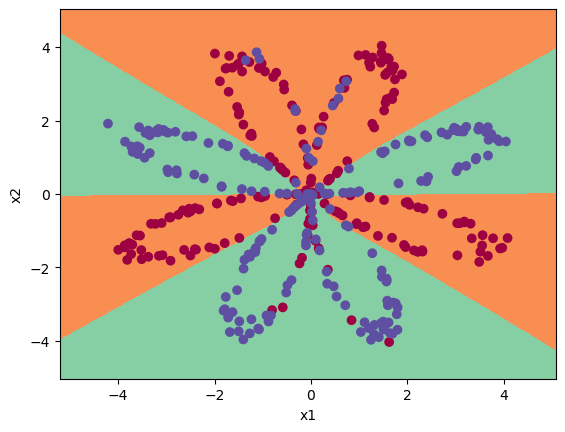

In [40]:
learning_rate_list = [1, 2, 5, 10, 15, 20]

for learning_rate in learning_rate_list:
    parameters = model(features, labels, learning_rate, num_epochs=10000)
    plot_decision_boundary(lambda X: predict(parameters, X.T), features, labels.ravel())
    
    predictions = predict(parameters, features)
    print('Accuracy for learning rate at %d : %d' % (learning_rate, float((np.dot(labels, predictions.T) + np.dot(1-labels, 1-predictions.T)) / float(labels.size) * 100)) + '%')

As the learning rate increases the more effiecient the model is going to be trained.